In [1]:
'''
用于调试代码
'''
from FMG_P import *

import pylab

In [9]:
P1, FMG1 = form_FMG_P(r"D:\LEARNINNNNNNNNNNNNG\ExperimentData\20230326传感器校准数据\3-1.db", r"D:\LEARNINNNNNNNNNNNNG\ExperimentData\20230326传感器校准数据\3-1.txt", 1, 0)
P2, FMG2 = form_FMG_P(r"D:\LEARNINNNNNNNNNNNNG\ExperimentData\20230326传感器校准数据\3-2.db", r"D:\LEARNINNNNNNNNNNNNG\ExperimentData\20230326传感器校准数据\3-2.txt", 1, 0)
P3, FMG3 = form_FMG_P(r"D:\LEARNINNNNNNNNNNNNG\ExperimentData\20230326传感器校准数据\3-3.db", r"D:\LEARNINNNNNNNNNNNNG\ExperimentData\20230326传感器校准数据\3-3.txt", 1, 0)
# 横向合并三个数组
P = np.hstack((P1, P2, P3))
FMG = np.hstack((FMG1, FMG2, FMG3))

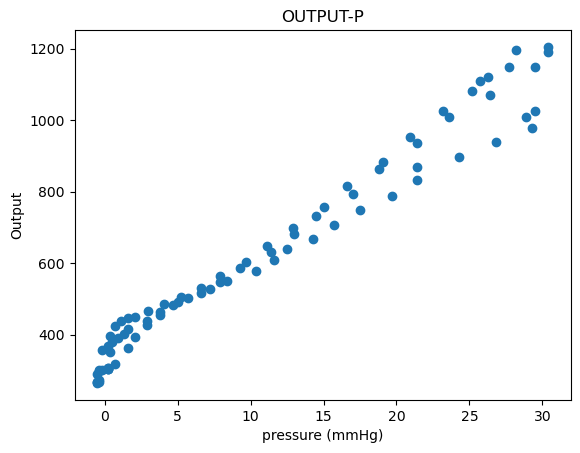

In [10]:
plt.figure()
plt.scatter(P, FMG, label = "system output")
plt.title("OUTPUT-P")
plt.xlabel("pressure (mmHg)")
plt.ylabel("Output")
plt.show()

         3          2
0.01025 x - 0.4732 x + 32.2 x + 329.7


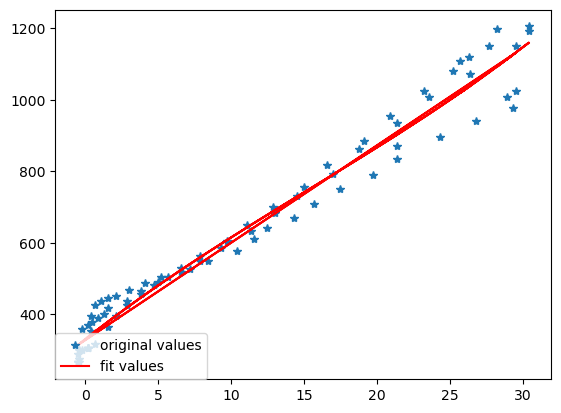

In [14]:
"""
多项式拟合
"""
x = P
y = FMG

z1 = np.polyfit(x, y, 3)              # 曲线拟合，返回值为多项式的各项系数
p1 = np.poly1d(z1)                    # 返回值为多项式的表达式，也就是函数式子
print(p1)
y_pred = p1(x)                        # 根据函数的多项式表达式，求解 y
# print(np.polyval(p1, 29))             根据多项式求解特定 x 对应的 y 值
# print(np.polyval(z1, 29))             根据多项式求解特定 x 对应的 y 值

plot1 = pylab.plot(x, y, '*', label='original values')
plot2 = pylab.plot(x, y_pred, 'r', label='fit values')
pylab.title('')
pylab.xlabel('')
pylab.ylabel('')
pylab.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))
pylab.show()
# pylab.savefig('p1.png', dpi=200, bbox_inches='tight')

In [15]:
x

array([ 0.2,  0.2,  0.2,  0.2,  0.2,  0.7,  1.6,  2.1,  2.9,  3.8,  4.7,
        5.7,  7.2,  8.4, 10.4, 11.6, 12.5, 14.3, 15.7, 17.5, 19.7, 21.4,
       21.4, 24.3, 26.8, 29.3, 28.9, 29.5, -0.4, -0.4, -0.5,  0.4,  0.2,
        0.9,  0.5,  1.3,  1.6,  2.9,  3.8,  5. ,  6.6,  7.9,  9.3, 11.4,
       13. , 14.5, 17. , 18.8, 21.4, 23.6, 26.4, 25.7, 29.5, -0.5, -0.5,
       -0.5, -0.4, -0.4, -0.2, -0.2,  0.4,  0.7,  1.1,  1.6,  2.1,  3. ,
        4.1,  5.2,  6.6,  7.9,  9.7, 11.1, 12.9, 15. , 16.6, 19.1, 20.9,
       23.2, 25.2, 26.3, 27.7, 30.4, 28.2, 30.4], dtype=float32)

In [16]:
y_pred

array([ 336.0759 ,  336.0759 ,  336.0759 ,  336.0759 ,  336.0759 ,
        351.96738,  380.00812,  395.2866 ,  419.3104 ,  445.75113,
        471.61453,  499.72906,  540.80286,  572.83594,  624.9015 ,
        655.52014,  678.2582 ,  723.34717,  758.248  ,  803.1991 ,
        858.7467 ,  902.51465,  902.51465,  979.8074 , 1050.0829 ,
       1124.7444 , 1112.4642 , 1130.9357 ,  316.69714,  316.69714,
        313.43372,  342.46008,  336.0759 ,  358.2603 ,  345.6383 ,
        370.73975,  380.00812,  419.3104 ,  445.75113,  480.1151 ,
        524.52094,  559.5701 ,  596.4488 ,  650.44324,  690.8253 ,
        728.33716,  790.6858 ,  835.9048 ,  902.51465,  960.7854 ,
       1038.569  , 1018.6781 , 1130.9357 ,  313.43372,  313.43372,
        313.43372,  316.69714,  316.69714,  323.19492,  323.19492,
        342.46008,  351.96738,  364.5176 ,  380.00812,  395.2866 ,
        422.27814,  454.4342 ,  485.75012,  524.52094,  559.5701 ,
        606.8433 ,  642.80927,  688.31506,  740.80347,  780.69

In [21]:
dd = pd.DataFrame({'x': x, 'y': y_pred})

sort_dd = dd.sort_values(by="y")
print(sort_dd)

            x            y
53  -0.500000   313.433716
30  -0.500000   313.433716
55  -0.500000   313.433716
54  -0.500000   313.433716
29  -0.400000   316.697144
..        ...          ...
25  29.299999  1124.744385
27  29.500000  1130.935669
52  29.500000  1130.935669
81  30.400000  1159.232666
83  30.400000  1159.232666

[84 rows x 2 columns]


In [25]:
for index, row in dd.iterrows():
    print(row['x'], row['y'])

0.2 336.0759
0.2 336.0759
0.2 336.0759
0.2 336.0759
0.2 336.0759
0.7 351.96738
1.6 380.00812
2.1 395.2866
2.9 419.3104
3.8 445.75113
4.7 471.61453
5.7 499.72906
7.2 540.80286
8.4 572.83594
10.4 624.9015
11.6 655.52014
12.5 678.2582
14.3 723.34717
15.7 758.248
17.5 803.1991
19.7 858.7467
21.4 902.51465
21.4 902.51465
24.3 979.8074
26.8 1050.0829
29.3 1124.7444
28.9 1112.4642
29.5 1130.9357
-0.4 316.69714
-0.4 316.69714
-0.5 313.43372
0.4 342.46008
0.2 336.0759
0.9 358.2603
0.5 345.6383
1.3 370.73975
1.6 380.00812
2.9 419.3104
3.8 445.75113
5.0 480.1151
6.6 524.52094
7.9 559.5701
9.3 596.4488
11.4 650.44324
13.0 690.8253
14.5 728.33716
17.0 790.6858
18.8 835.9048
21.4 902.51465
23.6 960.7854
26.4 1038.569
25.7 1018.6781
29.5 1130.9357
-0.5 313.43372
-0.5 313.43372
-0.5 313.43372
-0.4 316.69714
-0.4 316.69714
-0.2 323.19492
-0.2 323.19492
0.4 342.46008
0.7 351.96738
1.1 364.5176
1.6 380.00812
2.1 395.2866
3.0 422.27814
4.1 454.4342
5.2 485.75012
6.6 524.52094
7.9 559.5701
9.7 606.8433
11.

In [26]:
for index, row in sort_dd.iterrows():
    print(row['x'], row['y'])

-0.5 313.43372
-0.5 313.43372
-0.5 313.43372
-0.5 313.43372
-0.4 316.69714
-0.4 316.69714
-0.4 316.69714
-0.4 316.69714
-0.2 323.19492
-0.2 323.19492
0.2 336.0759
0.2 336.0759
0.2 336.0759
0.2 336.0759
0.2 336.0759
0.2 336.0759
0.4 342.46008
0.4 342.46008
0.5 345.6383
0.7 351.96738
0.7 351.96738
0.9 358.2603
1.1 364.5176
1.3 370.73975
1.6 380.00812
1.6 380.00812
1.6 380.00812
2.1 395.2866
2.1 395.2866
2.9 419.3104
2.9 419.3104
3.0 422.27814
3.8 445.75113
3.8 445.75113
4.1 454.4342
4.7 471.61453
5.0 480.1151
5.2 485.75012
5.7 499.72906
6.6 524.52094
6.6 524.52094
7.2 540.80286
7.9 559.5701
7.9 559.5701
8.4 572.83594
9.3 596.4488
9.7 606.8433
10.4 624.9015
11.1 642.80927
11.4 650.44324
11.6 655.52014
12.5 678.2582
12.9 688.31506
13.0 690.8253
14.3 723.34717
14.5 728.33716
15.0 740.80347
15.7 758.248
16.6 780.69336
17.0 790.6858
17.5 803.1991
18.8 835.9048
19.1 843.4977
19.7 858.7467
20.9 889.5443
21.4 902.51465
21.4 902.51465
21.4 902.51465
23.2 950.0282
23.6 960.7854
24.3 979.8074
25.2 

In [ ]:
# 删除重复的行 
sort_dd.drop_duplicates(inplace=True)

[-9.97726617e+00 -1.77691932e+01  3.38186023e-01  6.43496104e-23
  2.59862671e+00  2.75344586e+02]


e:\code\wearable_lab\FMG_P.py:76: RuntimeWarning: invalid value encountered in power
  return C0*np.power((r - np.power(64*D*h*(1 + 0.488*np.power(h, 2)/np.power(t, 2))/P, 0.25)), 2) + b
e:\anaconda\install\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


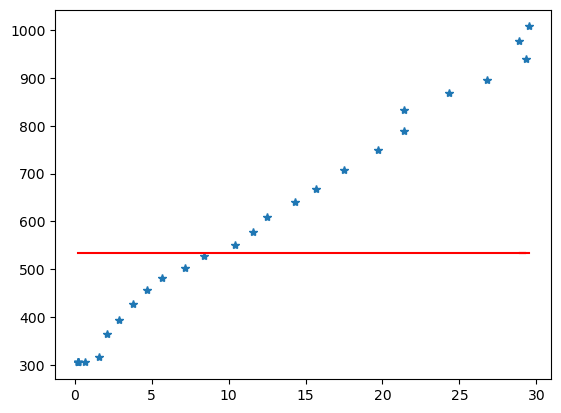

In [6]:
"""
基于curve_fit方法拟合平板变形理论方程中的参数
效果不好
"""
import pylab
from scipy.optimize import curve_fit

popt, pcov = curve_fit(plate_func, P1[0 : max_FMG_index], FMG[0 : max_FMG_index])
y_pred = [plate_func(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]) for i in P1[0 : max_FMG_index]]
print(popt)

plot1 = pylab.plot(P1[0 : max_FMG_index], FMG[0 : max_FMG_index], '*', label = 'original')
plot2 = pylab.plot(P1[0 : max_FMG_index], y_pred, 'r', label = 'fit curve')
pylab.show()